# Лабораторна робота No4
## ФБ-21 Тютюннікова Віолета
### Структури для роботи з великими обсягами даних в Python
### *Мета: отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit)*
----
## ( 1 РІВЕНЬ)
----

In [79]:
import pandas as pd
import numpy as np
import timeit
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
print("Все встановлено!")

Все встановлено!


#### Працюватимемо з датафреймом "Individual household electric power consumption Data Set". Спочатку завантажуємо дані використовуючи Pandas Dataframe:

In [80]:
start = timeit.default_timer()
names = ['date', 'time', 'global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 
                'sub_metering_2', 'sub_metering_3']

df = pd.read_csv('household_power_consumption.txt', sep=';', header=0, names= names)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 
                'sub_metering_2', 'sub_metering_3']] = df[['global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 
                'sub_metering_2', 'sub_metering_3']].astype(float)
stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)
print(df.head())

/var/folders/sb/sl366d996ss4kv01f83k587h0000gn/T/ipykernel_92819/3536846947.py:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt', sep=';', header=0, names= names)



Час виконання:  2.7172337078955024
         date      time  global_active_power  global_reactive_power  voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


#### Тепер завантажуємо з використанням Numpy array:

In [81]:
start = timeit.default_timer()
dtype = [('date', 'U10'), ('time', 'U8'), ('global_active_power', float), ('global_reactive_power', float), ('voltage', float), ('global_intensity', float), ('sub_metering_1', float), ('sub_metering_2', float), ('sub_metering_3', float)]
data = np.genfromtxt('household_power_consumption.txt', delimiter=';', skip_header=1, dtype=dtype, filling_values=0)

stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)
print(data[:5])


Час виконання:  6.525137374876067
[('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.)
 ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.)
 ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0., 1., 17.)
 ('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.)]


---
## 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.
---

#### Спочатку зробимо це використовуючи pandas dataframe:

In [82]:
start = timeit.default_timer()
lvl1_t1_pandas = df[df['global_active_power'] > 5]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(lvl1_t1_pandas.head())


Час виконання:  0.03501595789566636
          date      time  global_active_power  global_reactive_power  voltage  \
1   16/12/2006  17:25:00                5.360                  0.436   233.63   
2   16/12/2006  17:26:00                5.374                  0.498   233.29   
3   16/12/2006  17:27:00                5.388                  0.502   233.74   
11  16/12/2006  17:35:00                5.412                  0.470   232.78   
12  16/12/2006  17:36:00                5.224                  0.478   232.99   

    global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
1               23.0             0.0             1.0            16.0  
2               23.0             0.0             2.0            17.0  
3               23.0             0.0             1.0            17.0  
11              23.2             0.0             1.0            17.0  
12              22.4             0.0             1.0            16.0  


#### Тепер зробимо те саме з використанням numpy array:

In [83]:
start = timeit.default_timer()
lvl1_t1_numpy = np.where(data['global_active_power'] > 5)
filtered_t1 = data[lvl1_t1_numpy]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(filtered_t1[:5])


Час виконання:  0.03448787494562566
[('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.)
 ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.)
 ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0., 1., 17.)
 ('16/12/2006', '17:35:00', 5.412, 0.47 , 232.78, 23.2, 0., 1., 17.)
 ('16/12/2006', '17:36:00', 5.224, 0.478, 232.99, 22.4, 0., 1., 16.)]


---
## 2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.
---

#### Робимо використовуючи pandas dataframe:

In [84]:
start = timeit.default_timer()
lvl1_t2_pandas = df[df['voltage'] > 235]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(lvl1_t2_pandas.head())


Час виконання:  0.12489212490618229
          date      time  global_active_power  global_reactive_power  voltage  \
4   16/12/2006  17:28:00                3.666                  0.528   235.68   
5   16/12/2006  17:29:00                3.520                  0.522   235.02   
6   16/12/2006  17:30:00                3.702                  0.520   235.09   
7   16/12/2006  17:31:00                3.700                  0.520   235.22   
14  16/12/2006  17:38:00                4.054                  0.422   235.24   

    global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
4               15.8             0.0             1.0            17.0  
5               15.0             0.0             2.0            17.0  
6               15.8             0.0             1.0            17.0  
7               15.8             0.0             1.0            17.0  
14              17.6             0.0             1.0            17.0  


#### Використовуючи numpy array:

In [85]:
start = timeit.default_timer()
lvl1_t2_numpy = np.where(data['voltage'] > 235)
filtered_t2 = data[lvl1_t2_numpy]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(filtered_t2[:5])


Час виконання:  0.23375795781612396
[('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.)
 ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:31:00', 3.7  , 0.52 , 235.22, 15.8, 0., 1., 17.)
 ('16/12/2006', '17:38:00', 4.054, 0.422, 235.24, 17.6, 0., 1., 17.)]


---
## 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.
---

#### Зробимо використовуючи pandas dataframe:

In [86]:
start = timeit.default_timer()
lvl1_t3_pandas = df[(df['global_intensity'] >= 19) & (df['global_intensity'] <= 20) & (df['sub_metering_2'] > df['sub_metering_3'])]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(lvl1_t3_pandas.head())


Час виконання:  0.02174954186193645
           date      time  global_active_power  global_reactive_power  \
45   16/12/2006  18:09:00                4.464                  0.136   
460  17/12/2006  01:04:00                4.582                  0.258   
464  17/12/2006  01:08:00                4.618                  0.104   
475  17/12/2006  01:19:00                4.636                  0.140   
476  17/12/2006  01:20:00                4.634                  0.152   

     voltage  global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  
45    234.66              19.0             0.0            37.0            16.0  
460   238.08              19.6             0.0            13.0             0.0  
464   239.61              19.6             0.0            27.0             0.0  
475   237.37              19.4             0.0            36.0             0.0  
476   237.17              19.4             0.0            35.0             0.0  


#### Тепер зробимо використовуючи numpy array:

In [87]:
start = timeit.default_timer()
lvl1_t3_numpy = np.where(((data['global_intensity'] >= 19) & (data['global_intensity'] <= 20)) & ((data['sub_metering_2'] > data['sub_metering_3'])))
condition3n = data[lvl1_t3_numpy]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(condition3n[:5])



Час виконання:  0.03665712499059737
[('16/12/2006', '18:09:00', 4.464, 0.136, 234.66, 19. , 0., 37., 16.)
 ('17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0., 13.,  0.)
 ('17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0., 27.,  0.)
 ('17/12/2006', '01:19:00', 4.636, 0.14 , 237.37, 19.4, 0., 36.,  0.)
 ('17/12/2006', '01:20:00', 4.634, 0.152, 237.17, 19.4, 0., 35.,  0.)]


---
## 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії.
---

#### Використовуючи pandas dataframe:

In [88]:
start = timeit.default_timer()
random_df = df.sample(n=500000, replace=False)
lvl1_t4_pandas = random_df[['sub_metering_1', 'sub_metering_2', 'sub_metering_3']].mean()
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(lvl1_t4_pandas)


Час виконання:  0.12214812496677041
sub_metering_1    1.125664
sub_metering_2    1.295834
sub_metering_3    6.465062
dtype: float64


#### З використанням numpy array;

In [90]:
start = timeit.default_timer()
random_numpy = np.random.choice(len(data), size=500000, replace=False)
random_data = data[random_numpy]

sub1 = random_data['sub_metering_1']
sub2 = random_data['sub_metering_2']
sub3 = random_data['sub_metering_3']

lvl1_t4_numpy1 = np.mean(sub1)
lvl1_t4_numpy2 = np.mean(sub2)
lvl1_t4_numpy3 = np.mean(sub3)
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print("sub_metering_1:", lvl1_t4_numpy1)
print("sub_metering_2:", lvl1_t4_numpy2)
print("sub_metering_3:", lvl1_t4_numpy3)



Час виконання:  0.15431850007735193
sub_metering_1: 1.113696
sub_metering_2: 1.286218
sub_metering_3: 6.379528


---
## 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.
---

#### Робимо використовуючи pandas dataframe;

In [91]:
start = timeit.default_timer()
lvl1_t5_pandas = df[(df['time'] > '18:00:00') & (df['global_active_power'] > 6) & (df['sub_metering_2'] > df['sub_metering_1']) & 
                    (df['sub_metering_2'] > df['sub_metering_3'])]

first = lvl1_t5_pandas.iloc[0:len(lvl1_t5_pandas)//2:3]
second = lvl1_t5_pandas.iloc[len(lvl1_t5_pandas)//2:len(lvl1_t5_pandas):4]
result = pd.concat([first, second])
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(result.head())


Час виконання:  0.08875383390113711
             date      time  global_active_power  global_reactive_power  \
41     16/12/2006  18:05:00                6.052                  0.192   
44     16/12/2006  18:08:00                6.308                  0.116   
17494  28/12/2006  20:58:00                6.386                  0.374   
17498  28/12/2006  21:02:00                8.088                  0.262   
17501  28/12/2006  21:05:00                7.230                  0.152   

       voltage  global_intensity  sub_metering_1  sub_metering_2  \
41      232.93              26.2             0.0            37.0   
44      232.25              27.0             0.0            36.0   
17494   236.63              27.0             1.0            36.0   
17498   235.50              34.4             1.0            72.0   
17501   235.22              30.6             1.0            73.0   

       sub_metering_3  
41               17.0  
44               17.0  
17494            17.0  
17498  

#### Використовуючи numpy array:

In [92]:
start = timeit.default_timer()
filtered_data1 = np.where((data['time'] > '18:00:00') & (data['global_active_power'] > 6) & (data['sub_metering_2'] > data['sub_metering_1']) & 
                               (data['sub_metering_2'] > data['sub_metering_3']))
filtered_data = data[filtered_data1]

first_ind = np.arange(0, len(filtered_data)//2, 3)
second_ind = np.arange(len(filtered_data)//2, len(filtered_data), 4)

first_half = filtered_data[first_ind]
second_half = filtered_data[second_ind]

result2 = np.concatenate([first_half, second_half])

stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(result2[:5])


Час виконання:  0.046721542021259665
[('16/12/2006', '18:05:00', 6.052, 0.192, 232.93, 26.2, 0., 37., 17.)
 ('16/12/2006', '18:08:00', 6.308, 0.116, 232.25, 27. , 0., 36., 17.)
 ('28/12/2006', '20:58:00', 6.386, 0.374, 236.63, 27. , 1., 36., 17.)
 ('28/12/2006', '21:02:00', 8.088, 0.262, 235.5 , 34.4, 1., 72., 17.)
 ('28/12/2006', '21:05:00', 7.23 , 0.152, 235.22, 30.6, 1., 73., 17.)]


----
## ( 2 РІВЕНЬ)
----

#### Першим кроком є вибір датасету. Було обрано датасет "Automobile", який відповідає всім вимогам. У датасеті  наявні наступні колонки:
#### ‣symboling *(Оцінка ризику. Це категоріальна оцінка, яка вказує на ступінь ризику страхового випадку. Від'ємні значення означають, що автомобіль має менш ніж середній ризик, а позитивні значення - більший ризик.)*
#### ‣normalized-losses: *(Нормалізовані збитки. Це числове значення, яке вказує на середній обсяг збитків страхових виплат за рік для цього типу автомобіля)*        
#### ‣make: *(Виробник автомобіля)*                    
#### ‣fuel-type: *(Тип палива, яке використовується в автомобілі (дизель або бензин))*             
#### ‣aspiration: *(Тип наддува двигуна (стандартний або турбонаддув)*         
#### ‣num-of-doors: *(Кількість дверей автомобіля)*     
#### ‣body-style: *(Стиль кузова автомобіля)*      
#### ‣drive-wheels: *(Тип приводу коліс (4wd - повний привід, fwd - передній привід, rwd - задній привід))*           
#### ‣engine-location: *( Розташування двигуна (переднє або заднє))*       
#### ‣wheel-base: *(Відстань між передньою і задньою віссю автомобіля)*         
#### ‣length: *(Довжина)*                
#### ‣width: *(Ширина)*      
#### ‣height: *(Висота)*               
#### ‣curb-weight: *(Вага автомобіля без пасажирів або вантажу)*        
#### ‣engine-type: *(Тип двигуна)*       
#### ‣num-of-cylinders: *(Кількість циліндрів у двигуні)*        
#### ‣engine-size: *(Об'єм двигуна)*              
#### ‣fuel-system: *(Система подачі палива до двигуна)*           
#### ‣bore: *(Діаметр поршня)*       
#### ‣stroke: *(Хід поршня)*                 
#### ‣compression-ratio: *(Стиснення паливно-повітряної суміші у циліндрах)*        
#### ‣horsepower: *(Кінські сили (потужність двигуна))* 
#### ‣peak-rpm: *(Максимальна обертова частота)*            
#### ‣city-mpg: *(Розхід палива у місті )*       
#### ‣highway-mpg: *(Розхід палива на трасі)*
#### ‣price: *(Ціна автомобіля)*

#### Завантажуємо файл використовуючи pandas dataframe:

In [93]:
start = timeit.default_timer()
headers = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
           'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
           'horsepower','peak-rpm','city-mpg','highway-mpg','price']
df2 = pd.read_csv('automobile/imports-85.data', names=headers)
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(df2.head())


Час виконання:  0.0076883339788764715
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-sys

#### Тепер завантажуємо з використанням numpy array:

In [94]:
start = timeit.default_timer()

data2 = np.genfromtxt('automobile/imports-85.data', delimiter=',', dtype=str)
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(data2[:5])


Час виконання:  0.011194708058610559
[['3' '?' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '13495']
 ['3' '?' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '16500']
 ['1' '?' 'alfa-romero' 'gas' 'std' 'two' 'hatchback' 'rwd' 'front'
  '94.50' '171.20' '65.50' '52.40' '2823' 'ohcv' 'six' '152' 'mpfi'
  '2.68' '3.47' '9.00' '154' '5000' '19' '26' '16500']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '99.80'
  '176.60' '66.20' '54.30' '2337' 'ohc' 'four' '109' 'mpfi' '3.19' '3.40'
  '10.00' '102' '5500' '24' '30' '13950']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' '4wd' 'front' '99.40'
  '176.60' '66.40' '54.30' '2824' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.00' '115' '5500' '18' '22' '17450']]


---
## 1. Поборотися із зниклими даними.
---

#### Перший спосіб позбутися втрачених даних це просто видалити рядки, що їх містять. Зробимо це використовуючи dataframe (робимо на копії початкового датафрейму, щоб не впливати на подальші варіанти обробки втрачених даних):

In [95]:
df_copy1 = df2.copy()
start = timeit.default_timer()

df_copy1.replace('?', np.nan, inplace=True)
df_copy1.dropna(inplace=True)

stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)

print(df_copy1.head())


Час виконання:  0.004466708982363343
    symboling normalized-losses  make fuel-type aspiration num-of-doors  \
3           2               164  audi       gas        std         four   
4           2               164  audi       gas        std         four   
6           1               158  audi       gas        std         four   
8           1               158  audi       gas      turbo         four   
10          2               192   bmw       gas        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
3       sedan          fwd           front        99.8  ...          109   
4       sedan          4wd           front        99.4  ...          136   
6       sedan          fwd           front       105.8  ...          136   
8       sedan          fwd           front       105.8  ...          131   
10      sedan          rwd           front       101.2  ...          108   

    fuel-system  bore  stroke compression-ratio horsep

#### Тепер також видалимо рядки, в якіх наявні втрачені дані використовуючи numpy array.

In [96]:
data2_copy = data2.copy()
start = timeit.default_timer()

data2_copy[data2_copy == '?'] = np.nan
data2_clean = data2_copy[~np.any(data2_copy == "nan", axis=1)]
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(data2_clean[:5])


Час виконання:  0.001266708131879568
[['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '99.80'
  '176.60' '66.20' '54.30' '2337' 'ohc' 'four' '109' 'mpfi' '3.19' '3.40'
  '10.00' '102' '5500' '24' '30' '13950']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' '4wd' 'front' '99.40'
  '176.60' '66.40' '54.30' '2824' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.00' '115' '5500' '18' '22' '17450']
 ['1' '158' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '105.80'
  '192.70' '71.40' '55.70' '2844' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.50' '110' '5500' '19' '25' '17710']
 ['1' '158' 'audi' 'gas' 'turbo' 'four' 'sedan' 'fwd' 'front' '105.80'
  '192.70' '71.40' '55.90' '3086' 'ohc' 'five' '131' 'mpfi' '3.13' '3.40'
  '8.30' '140' '5500' '17' '20' '23875']
 ['2' '192' 'bmw' 'gas' 'std' 'two' 'sedan' 'rwd' 'front' '101.20'
  '176.80' '64.80' '54.30' '2395' 'ohc' 'four' '108' 'mpfi' '3.50' '2.80'
  '8.80' '101' '5800' '23' '29' '16430']]


#### Тепер вирішимо проблему з втраченими даними шляхом їх заповнення. Для цього будемо знаходити моду кожного стовбчика, у якому наявні втрачені дані (і відповідно замінемо усі nan на значення моди). Спочатку робимо це використовуючи pandas dataframe:

In [97]:
columns = ['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
start = timeit.default_timer()
df2.replace('?', np.nan, inplace=True)

for column in columns:
    df2[column] = df2[column].fillna(df2[column].mode()[0])
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(df2.head())


Час виконання:  0.008193915942683816
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               161  alfa-romero       gas        std          two   
1          3               161  alfa-romero       gas        std          two   
2          1               161  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-syst

#### Тепер використаємо numpy array:

In [99]:
start = timeit.default_timer()
def mode(array):
    modes = []
    for column in array.T:
        clean_column = column[column != '?']
        unique, number = np.unique(clean_column, return_counts=True)
        mode_index = np.argmax(number)
        mode_value = unique[mode_index]
        modes.append(mode_value)
    return modes

def replace(array, modes):
    for i, column in enumerate(array.T):
        missing = np.where(column == '?')[0]
        column[missing] = modes[i]

modes = mode(data2)
replace(data2, modes)
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print(data2[:5])


Час виконання:  0.004919333849102259
[['3' '161' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '13495']
 ['3' '161' 'alfa-romero' 'gas' 'std' 'two' 'convertible' 'rwd' 'front'
  '88.60' '168.80' '64.10' '48.80' '2548' 'dohc' 'four' '130' 'mpfi'
  '3.47' '2.68' '9.00' '111' '5000' '21' '27' '16500']
 ['1' '161' 'alfa-romero' 'gas' 'std' 'two' 'hatchback' 'rwd' 'front'
  '94.50' '171.20' '65.50' '52.40' '2823' 'ohcv' 'six' '152' 'mpfi'
  '2.68' '3.47' '9.00' '154' '5000' '19' '26' '16500']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' '99.80'
  '176.60' '66.20' '54.30' '2337' 'ohc' 'four' '109' 'mpfi' '3.19' '3.40'
  '10.00' '102' '5500' '24' '30' '13950']
 ['2' '164' 'audi' 'gas' 'std' 'four' 'sedan' '4wd' 'front' '99.40'
  '176.60' '66.40' '54.30' '2824' 'ohc' 'five' '136' 'mpfi' '3.19' '3.40'
  '8.00' '115' '5500' '18' '22' '17450']]
['0', '16

---
## 2. Пронормувати вибраний датасет або стандартизувати його
---

#### Визначаємо колонки які мають числові значення:

In [100]:
num_columns = df2.select_dtypes(include=['int', 'float'])

print("Числові стовбці:")
print(num_columns)

Числові стовбці:
     symboling  wheel-base  length  width  height  curb-weight  engine-size  \
0            3        88.6   168.8   64.1    48.8         2548          130   
1            3        88.6   168.8   64.1    48.8         2548          130   
2            1        94.5   171.2   65.5    52.4         2823          152   
3            2        99.8   176.6   66.2    54.3         2337          109   
4            2        99.4   176.6   66.4    54.3         2824          136   
..         ...         ...     ...    ...     ...          ...          ...   
200         -1       109.1   188.8   68.9    55.5         2952          141   
201         -1       109.1   188.8   68.8    55.5         3049          141   
202         -1       109.1   188.8   68.9    55.5         3012          173   
203         -1       109.1   188.8   68.9    55.5         3217          145   
204         -1       109.1   188.8   68.9    55.5         3062          141   

     compression-ratio  city-mpg  

#### Спочатку пронормуємо та стандартизуємо датасет використовуючи pandas dataframe:

In [101]:
# стандартизація
start = timeit.default_timer()
for column in num_columns:
    mean = df2[column].mean()
    std = df2[column].std()
    standardized = (df2[column] - mean) / std
    df2[column] = standardized
    
stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)
print("Стандартизований датафрейм:")
print(df2.head())

# нормалізація
start = timeit.default_timer()
for column in num_columns:
    min_val = df2[column].min()
    max_val = df2[column].max()
    normalized = (df2[column] - min_val) / (max_val - min_val)
    df2[column] = normalized 


stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)
print("Нормалізований датафрейм:")
print(df2.head())


Час виконання:  0.005749209085479379
Стандартизований датафрейм:
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0   1.739213               161  alfa-romero       gas        std          two   
1   1.739213               161  alfa-romero       gas        std          two   
2   0.133183               161  alfa-romero       gas        std          two   
3   0.936198               164         audi       gas        std         four   
4   0.936198               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front   -1.686643  ...     0.074267   
1  convertible          rwd           front   -1.686643  ...     0.074267   
2    hatchback          rwd           front   -0.706865  ...     0.602571   
3        sedan          fwd           front    0.173274  ...    -0.430023   
4        sedan          4wd           front    0.106848  ...  

#### Тепер зробимо те саме з numpy array:

In [102]:
column_indx = [0,9,10,11,12,13,16,20,23,24]
# стандартизація
start = timeit.default_timer()
for column_index in column_indx:
    column = data2[:, column_index].astype(float)
    mean2 = np.mean(column)
    std2 = np.std(column)
    standardized2 = (column - mean2) / std2
    data2[:, column_index] = standardized2
    
stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)
print("Стандартизований масив:")
print(data2[:5])

# нормалізація
start = timeit.default_timer()
for column_index in column_indx:
    column = data2[:, column_index].astype(float)
    min_val2 = np.min(column)
    max_val2 = np.max(column)
    normalized2 = (column - min_val2) / (max_val2 - min_val2)
    data2[:, column_index] = normalized2
    
stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)
print("Нормалізований масив:")
print(data2[:5])



Час виконання:  0.004624582827091217
Стандартизований масив:
[['1.74347043219' '161' 'alfa-romero' 'gas' 'std' 'two' 'convertible'
  'rwd' 'front' '-1.6907718018' '-0.4265214683' '-0.8447823517'
  '-2.0204173044' '-0.0145662821' 'dohc' 'four' '0.07444892511' 'mpfi'
  '3.47' '2.68' '-0.2883489098' '111' '5000' '-0.6465530277'
  '-0.5460587369' '13495']
 ['1.74347043219' '161' 'alfa-romero' 'gas' 'std' 'two' 'convertible'
  'rwd' 'front' '-1.6907718018' '-0.4265214683' '-0.8447823517'
  '-2.0204173044' '-0.0145662821' 'dohc' 'four' '0.07444892511' 'mpfi'
  '3.47' '2.68' '-0.2883489098' '111' '5000' '-0.6465530277'
  '-0.5460587369' '16500']
 ['0.13350899705' '161' 'alfa-romero' 'gas' 'std' 'two' 'hatchback' 'rwd'
  'front' '-0.7085958764' '-0.2315130468' '-0.1905661214' '-0.5435274761'
  '0.51488191613' 'ohcv' 'six' '0.60404616844' 'mpfi' '2.68' '3.47'
  '-0.2883489098' '154' '5000' '-0.9530116883' '-0.6916270607' '16500']
 ['0.93848971462' '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 

---
## 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
---

#### Будуємо використовуючи дані з pandas dataframe:

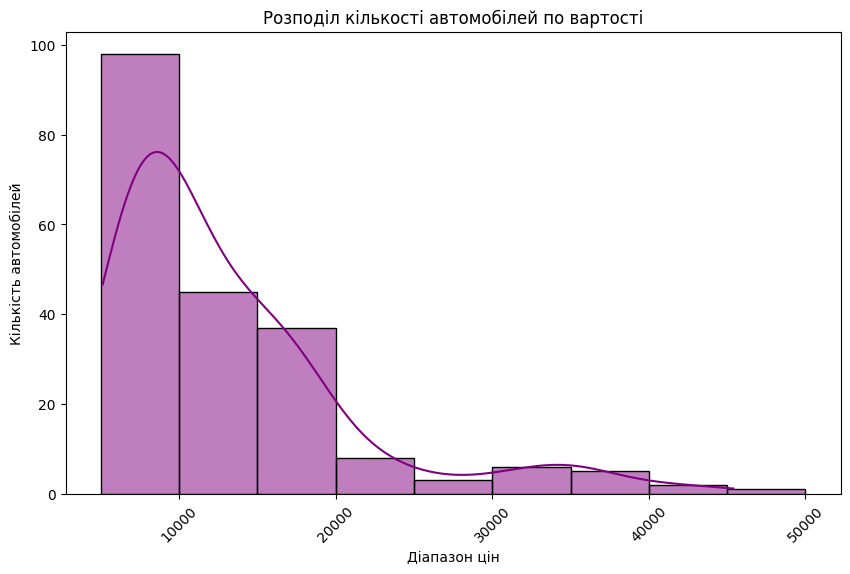


Час виконання:  0.23785620811395347


In [107]:
start = timeit.default_timer()
df2['price'] = pd.to_numeric(df2['price'])
price_ranges = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='price', bins=price_ranges, kde=True, color='purple')
plt.xlabel('Діапазон цін')
plt.ylabel('Кількість автомобілей')
plt.title('Розподіл кількості автомобілей по вартості')
plt.xticks(rotation=45)
plt.show()
stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)


#### Тепер будуємо використовуючи дані з numpy array:

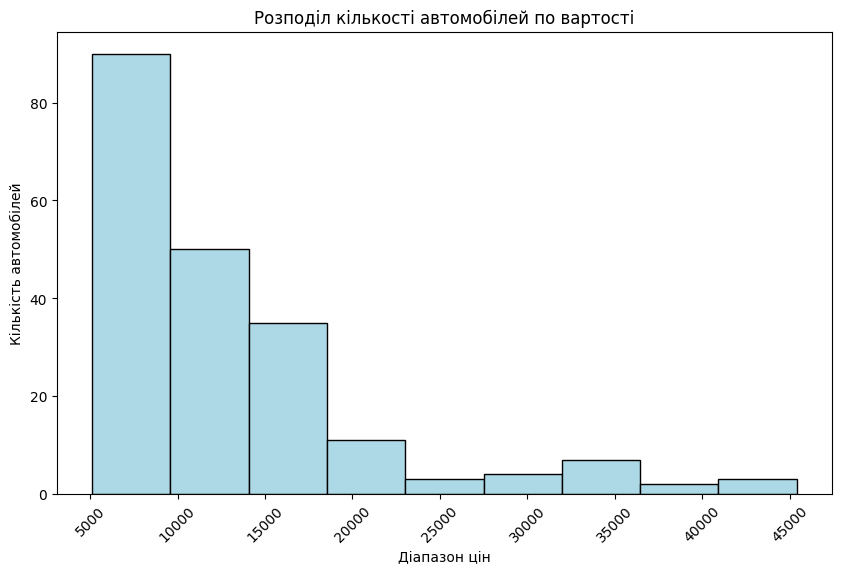


Час виконання:  0.12097316700965166


In [104]:
start = timeit.default_timer()
price_dat = data2[:, 25].astype(float)

min_price = np.min(price_dat)
max_price = np.max(price_dat)
price_ranges2 = np.linspace(min_price, max_price, 10)

plt.figure(figsize=(10, 6))
plt.hist(price_dat, bins=price_ranges2, color='lightblue', edgecolor='black')
plt.xlabel('Діапазон цін')
plt.ylabel('Кількість автомобілей')
plt.title('Розподіл кількості автомобілей по вартості')
plt.xticks(rotation=45)
plt.show()
stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)

---
## 4. Збудувати графік залежності одного integer/real атрибута від іншого.
---

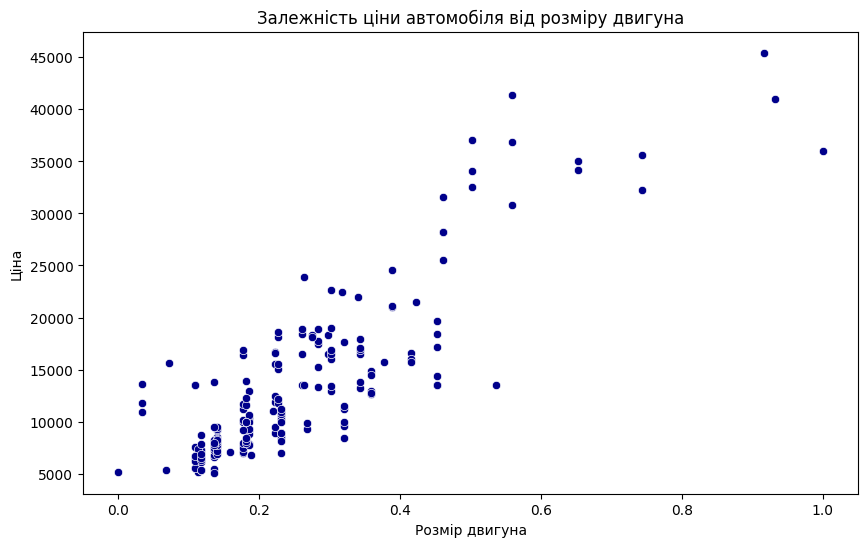


Час виконання:  0.12590966699644923


In [108]:
start = timeit.default_timer()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='engine-size', y='price', color='darkblue')
plt.xlabel('Розмір двигуна')
plt.ylabel('Ціна')
plt.title('Залежність ціни автомобіля від розміру двигуна')
plt.show()
stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)

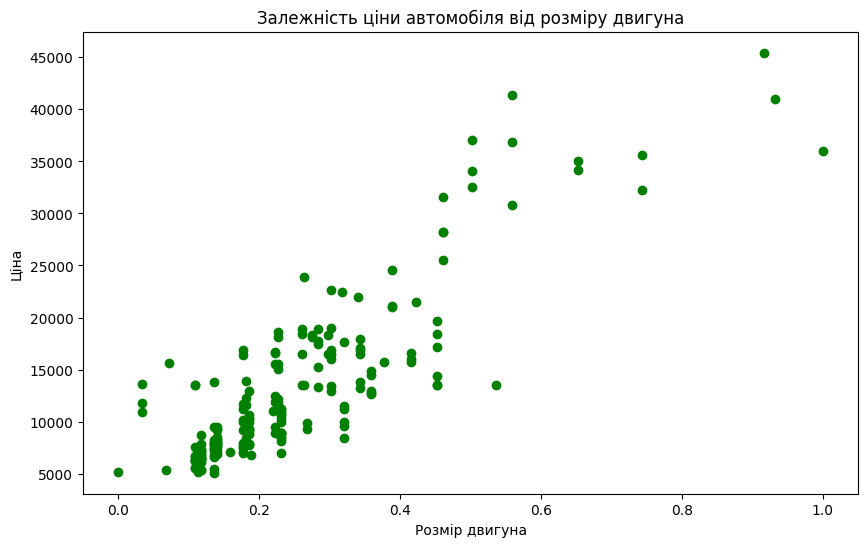


Час виконання:  0.1241413748357445


In [109]:
start = timeit.default_timer()
engine_size2 = data2[:, 16].astype(float)
price2 = data2[:, 25].astype(float)

plt.figure(figsize=(10, 6))
plt.scatter(engine_size2, price2, color='green')
plt.xlabel('Розмір двигуна')
plt.ylabel('Ціна')
plt.title('Залежність ціни автомобіля від розміру двигуна')
plt.show()
stop = timeit.default_timer()
print("\nЧас виконання: ", stop - start)

---
## 5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.
---


#### Порахуємо використовуючи pandas dataframe:

In [111]:
start = timeit.default_timer()
x = df2['engine-size'].astype(float)
y = df2['price'].astype(float)

pearson, _ = pearsonr(x, y)
spearman, _ = spearmanr(x, y)
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
print("Коефіцієнт Пірсона:", pearson)
print("Коефіцієнт Спірсона:", spearman)


Час виконання:  0.0077602919191122055
Коефіцієнт Пірсона: 0.8617686631091572
Коефіцієнт Спірсона: 0.8065679862276255


#### Тепер використаємо numpy array:

In [110]:
start = timeit.default_timer()
x2 = data2[:, 16].astype(float)
y2 = data2[:, 25].astype(float)

pearson2, _ = pearsonr(x2, y2)
spearman2, _ = spearmanr(x2, y2)
stop = timeit.default_timer()

print("\nЧас виконання: ", stop - start)
print("Коефіцієнт Пірсона:", pearson2)
print("Коефіцієнт Спірсона:", spearman2)



Час виконання:  0.007021000143140554
Коефіцієнт Пірсона: 0.8617686631079035
Коефіцієнт Спірсона: 0.8065679862276255


---
## 6. Провести One Hot Encoding категоріального string атрибуту.
---

#### Спочатку робимо з використанням pandas dataframe:

In [76]:
df_copy3 = df2.copy()

start = timeit.default_timer()
onehotencoder = OneHotEncoder()
x2 = onehotencoder.fit_transform(df_copy3[['body-style']]).toarray()

df_result = pd.DataFrame(x2, columns=onehotencoder.get_feature_names_out(['body-style']))

df_copy3 = pd.concat([df_copy3, df_result], axis=1)
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
print(df_copy3.head())


Час виконання:  0.004342957865446806
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0        1.0               161  alfa-romero       gas        std          two   
1        1.0               161  alfa-romero       gas        std          two   
2        0.6               161  alfa-romero       gas        std          two   
3        0.8               164         audi       gas        std         four   
4        0.8               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  horsepower  \
0  convertible          rwd           front    0.058309  ...         111   
1  convertible          rwd           front    0.058309  ...         111   
2    hatchback          rwd           front    0.230321  ...         154   
3        sedan          fwd           front    0.384840  ...         102   
4        sedan          4wd           front    0.373178  ...         115   

   peak-rpm  city-

#### Тепер робимо використовуючи numpy array:

In [113]:
data3_copy = data2.copy()
start = timeit.default_timer() 

data_enc = data3_copy[:, [6]]
onehotencoder2 = OneHotEncoder()

encoded_data = onehotencoder2.fit_transform(data_enc).toarray()
data2_encoded = np.hstack((data3_copy[:, :6], encoded_data, data3_copy[:, 7:]))
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
print(data2_encoded[:5])


Час виконання:  0.007368042133748531
[['1.0' '161' 'alfa-romero' 'gas' 'std' 'two' '1.0' '0.0' '0.0' '0.0'
  '0.0' 'rwd' 'front' '0.05830903789' '0.41343283582' '0.31666666666'
  '0.08333333334' '0.41117145074' 'dohc' 'four' '0.26037735847' 'mpfi'
  '3.47' '2.68' '0.12500000000' '111' '5000' '0.22222222222'
  '0.28947368421' '13495']
 ['1.0' '161' 'alfa-romero' 'gas' 'std' 'two' '1.0' '0.0' '0.0' '0.0'
  '0.0' 'rwd' 'front' '0.05830903789' '0.41343283582' '0.31666666666'
  '0.08333333334' '0.41117145074' 'dohc' 'four' '0.26037735847' 'mpfi'
  '3.47' '2.68' '0.12500000000' '111' '5000' '0.22222222222'
  '0.28947368421' '16500']
 ['0.59999999999' '161' 'alfa-romero' 'gas' 'std' 'two' '0.0' '0.0' '1.0'
  '0.0' '0.0' 'rwd' 'front' '0.23032069969' '0.44925373133'
  '0.43333333333' '0.38333333333' '0.51784328936' 'ohcv' 'six'
  '0.34339622640' 'mpfi' '2.68' '3.47' '0.12500000000' '154' '5000'
  '0.16666666665' '0.26315789475' '16500']
 ['0.79999999999' '164' 'audi' 'gas' 'std' 'four' '0.0' 

---
## 7. Провести візуалізацію багатовимірних даних.
---


Час виконання:  9.774164875037968


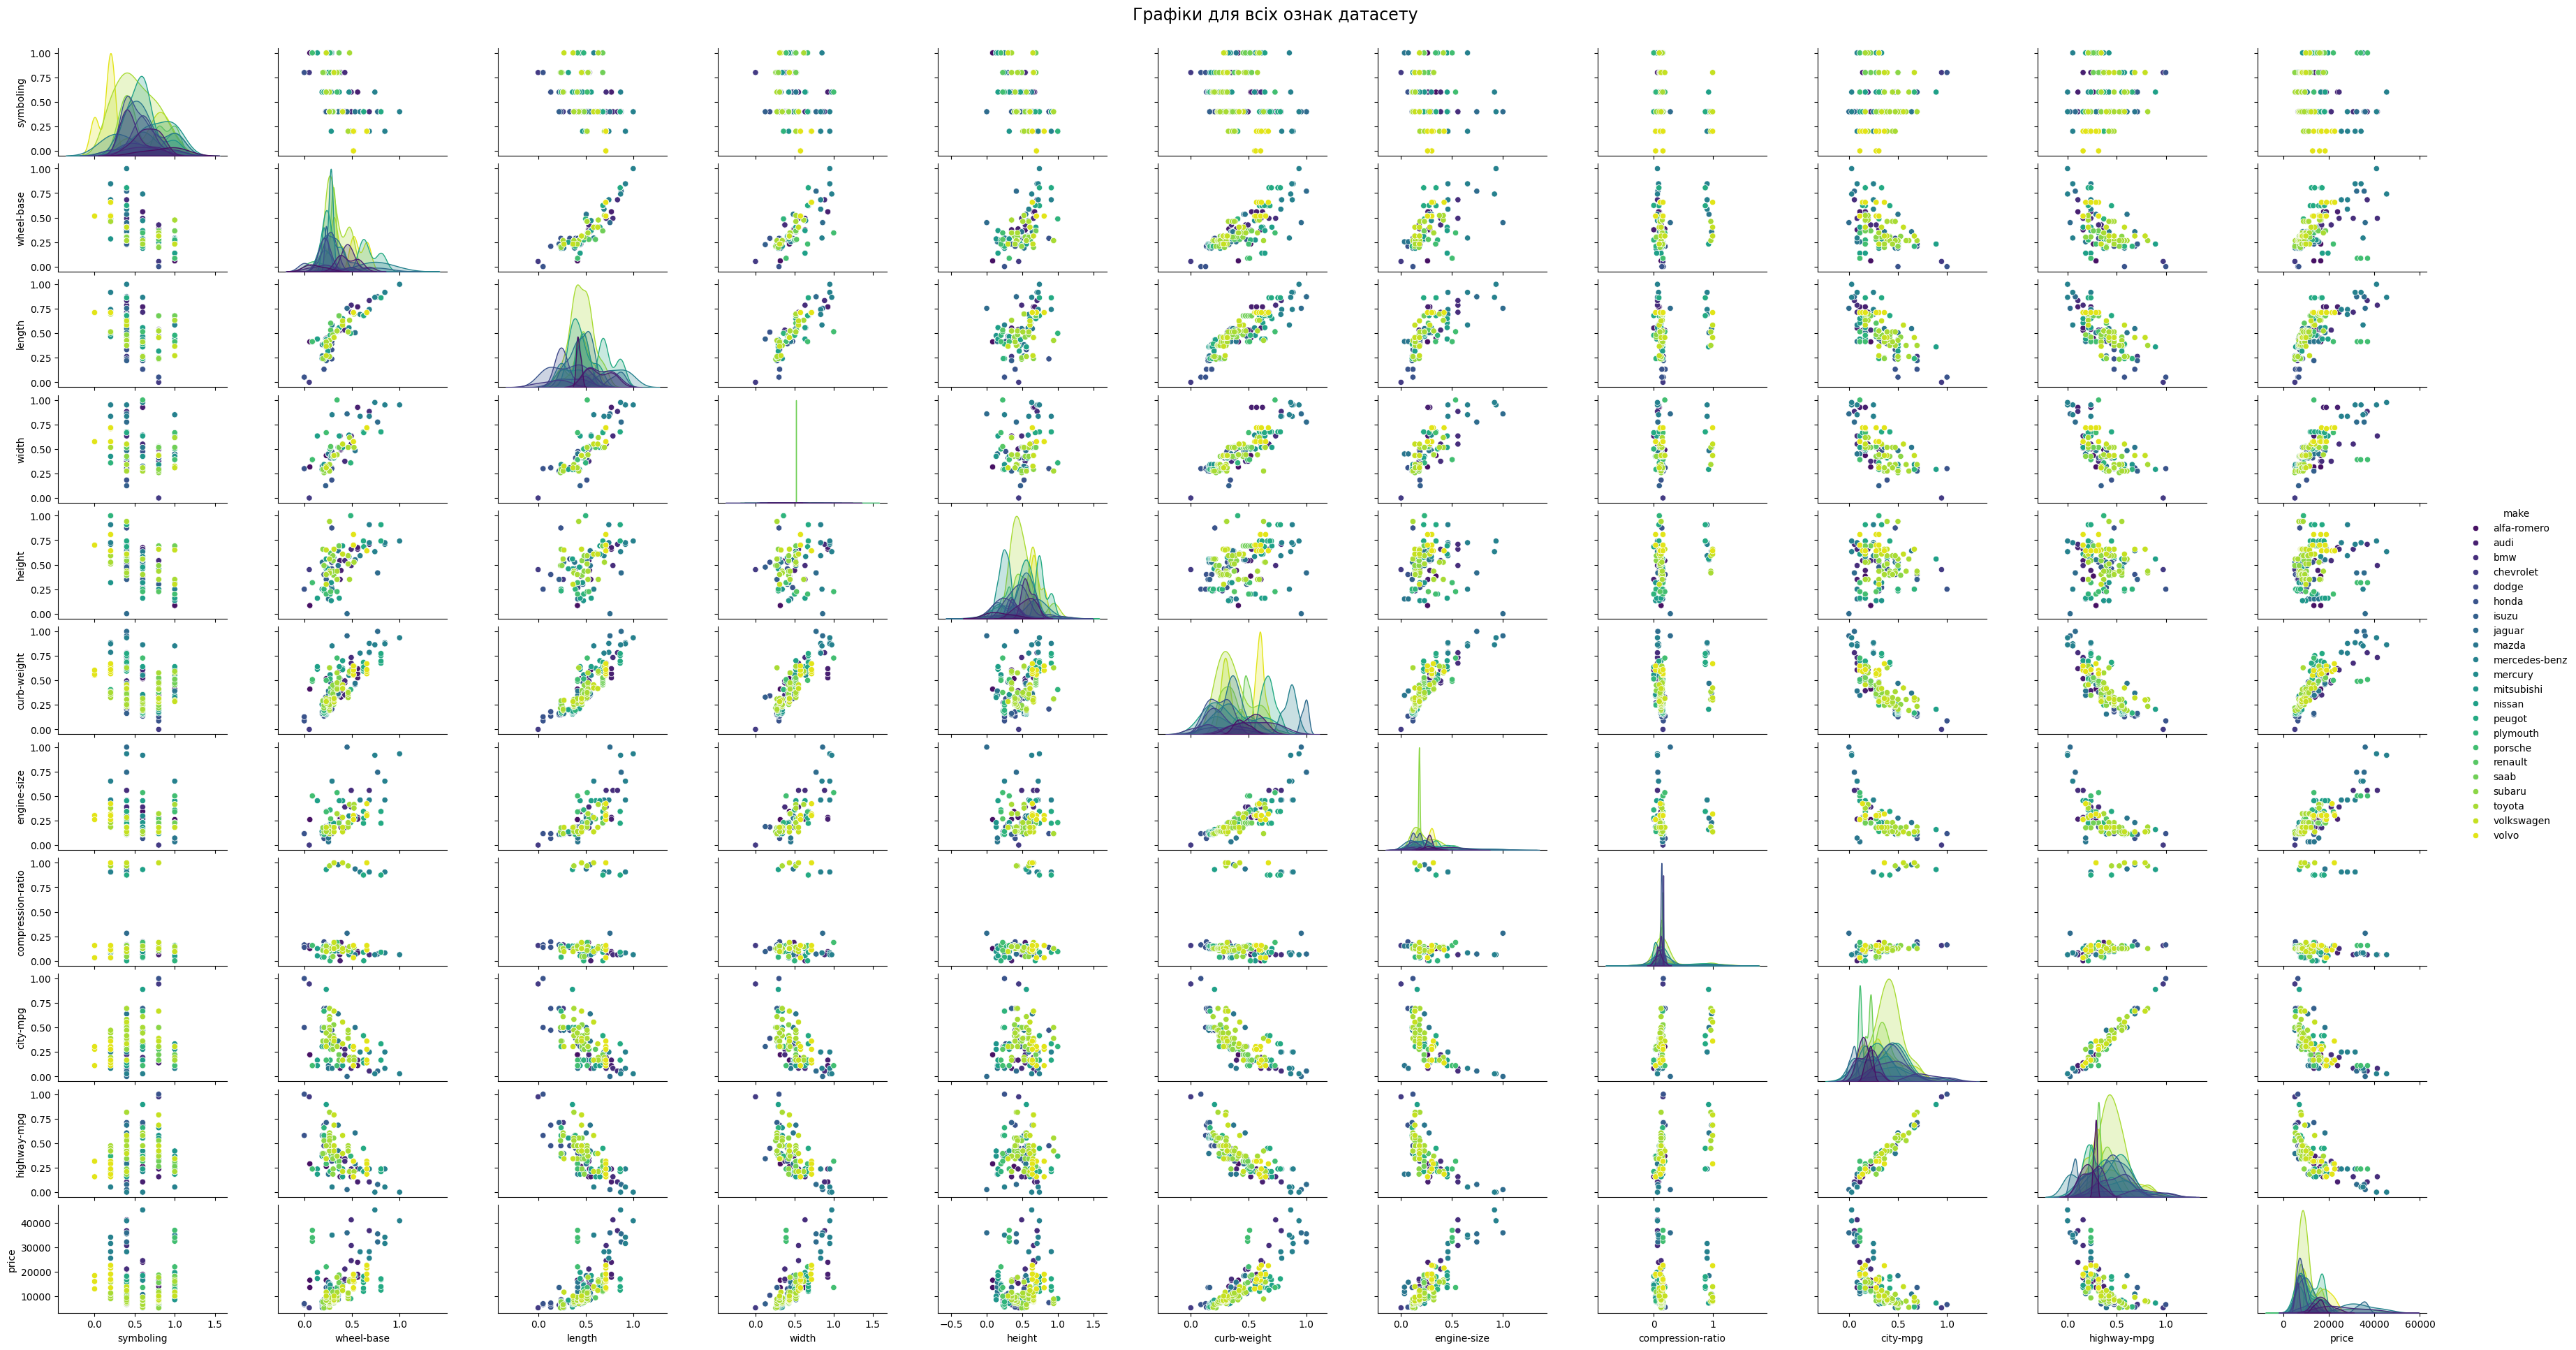

In [114]:
start = timeit.default_timer()
cols = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
           'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio',
           'horsepower','peak-rpm','city-mpg','highway-mpg','price']
graphic = sns.pairplot(df2[cols], hue='make', height=1.8, aspect=1.8, palette='viridis')
fig = graphic.fig 
fig.subplots_adjust(top=0.95, wspace=0.3)
title = fig.suptitle('Графіки для всіх ознак датасету', fontsize=17)
stop = timeit.default_timer() 

print("\nЧас виконання: ", stop - start)
plt.show()

|   Завдання  | Pandas (1) | Numpy Array (1) | Pandas (2) | Numpy Array (2) |
|-------------|------------|-----------------|------------|-----------------|
|  |  | Рівень 1 |  |  |
| Завантаження даних | 2.737 | 6.673 | - | - |
| Завдання №1 (вибірка) | 0.035 | 0.040 | - | - |
| Завдання №2 (вибірка) | 0.171 | 0.236 | - | - |
| Завдання №3 (вибірка) | 0.025 | 0.040 | - | - |
| Завдання №4 (вибірка + середнє) | 0.126 | 0.161 | - | - |
| Завдання №5 (вибірка) | 0.089 | 0.046 | - | - |
|  |  | Рівень 2 |  |  |
| Завантаження даних | - | - | 0.006 | 0.010 |
| Завдання №1 (зниклі дані - видалити) | - | - | 0.004 | 0.001 |
| Завдання №1 (зниклі дані - заміна на моду) | - | - | 0.009 | 0.004 |
| Завдання №2 (нормалізація) | - | - | 0.002 | 0.001 |
| Завдання №2 (стандартизація) | - | - | 0.006 | 0.004 |
| Завдання №3 (побудова гістограми) | - | - | 0.256 | 0.118 |
| Завдання №4 (побудова графіку залежності) | - | - | 0.135 | 0.125 |
| Завдання №5 (коефіцієнти Пірсона та Спірсона) | - | - | 0.008 | 0.004 |
| Завдання №6 (One Hot Encoding) | - | - | 0.005 | 0.003 |
| Завдання №7 (pairplot) | - | - | 9.681 | - |